
# Домашнее задание 2

Необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')    # можно выбрать для графиков свой любимый стиль
%matplotlib inline

import random
random.seed(42)

import datetime
from datetime import date

### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

In [2]:
import sys
# !pip install wordcloud

# Часть 1: рисковая 

В табличке `prices.tsv` лежат данные о том, как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по ценным бумагам. Подгрузим эти таблицы и посмотрим на них. 

In [3]:
df_prices = pd.read_csv('data/price.tsv', sep='\t')
df_prices = df_prices.drop('GEHC', axis=1) # сликом молодая компания
print(df_prices.shape)
df_prices

(2518, 521)


,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABNB,ABT,ACGL,...,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZS,ZTS
0,2013-03-05 00:00:00,27.946215,13.245518,71.640678,13.298839,24.972109,41.335518,NaN,28.678448,16.563334,...,58.596577,39.023003,24.914204,39.376095,67.826096,44.869999,20.423979,NaN,NaN,31.940346
1,2013-03-06 00:00:00,28.326160,13.735741,70.923820,13.129805,25.125229,41.515339,NaN,28.347576,16.583332,...,58.563908,39.283100,25.693598,39.738384,67.343094,44.790001,20.907482,NaN,NaN,31.530493
2,2013-03-07 00:00:00,28.332716,13.971428,70.961044,13.281566,24.958796,41.172813,NaN,28.479918,16.813334,...,58.008087,39.515335,24.870417,39.940308,66.985306,44.619999,21.057535,NaN,NaN,32.191845
3,2013-03-08 00:00:00,28.188597,14.065701,71.538284,13.316731,24.858923,41.515339,NaN,28.686729,16.879999,...,58.178085,39.701115,24.896696,40.219440,67.441467,45.040001,21.090885,NaN,NaN,31.754053
4,2013-03-11 00:00:00,28.044483,14.263680,72.180695,13.506428,25.078619,41.575287,NaN,28.893517,16.940001,...,58.302341,39.812572,25.185684,40.290707,67.745613,45.470001,21.365984,NaN,NaN,31.837889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2023-02-27 00:00:00,142.179993,15.630000,140.630005,147.919998,154.279999,156.630005,123.529999,99.769997,69.209999,...,110.550003,34.549999,102.550003,126.570000,123.300003,296.230011,50.389999,73.720001,131.839996,165.470001
2514,2023-02-28 00:00:00,141.970001,15.980000,144.960007,147.410004,153.899994,155.559998,123.279999,101.720001,70.000000,...,109.910004,38.070000,102.650002,127.160004,123.870003,300.250000,50.619999,74.589996,131.149994,167.000000
2515,2023-03-01 00:00:00,137.509995,16.030001,138.820007,145.309998,155.270004,156.509995,120.830002,100.830002,70.970001,...,110.889999,37.360001,101.089996,126.199997,122.080002,302.339996,50.439999,69.620003,128.440002,167.570007
2516,2023-03-02 00:00:00,141.669998,16.120001,139.210007,145.910004,154.380005,154.899994,122.379997,102.629997,70.900002,...,111.400002,37.680000,102.250000,128.679993,122.989998,306.059998,48.310001,70.629997,134.130005,168.580002


In [4]:
df_inf = pd.read_csv('data/information.tsv', sep='\t')
print(df_inf.shape)
df_inf.head()

(525, 12)


,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False


## 1.1 Разогреваемся

__а) [0 баллов]__ В колонке `Date` лежит день, когда торговалась бумага. Сейчас у неё тип `string`. Превратите её в `datetime` и сделайте индексом таблицы.

In [5]:
# (♡-_-♡)
df_prices['Date'] = pd.to_datetime(df_prices['Date'], unit='ns')
# проще работать с датами как с колонкой

-----------------

__б) [5 баллов]__ В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? 

In [6]:
# ヽ(♡‿♡)ノ
x = df_inf['NASDAQ'].count()
print(x, "ценных бумаг из таблицы входят в индекс NASDAQ")

525 ценных бумаг из таблицы входят в индекс NASDAQ


----------------------

Сколько ценных бумаг входят во все три индекса сразу?

In [7]:
# (´｡• ᵕ •｡`)
x = df_inf[(df_inf['S&P-500'] == True) & ( df_inf['NASDAQ'] == True) & (df_inf['DJI'] == True)]['Symbol'].count()
print(x, "ценных бумаг из таблицы входят сразу в три индекса: NASDAQ, S&P-500, DJI")

5 ценных бумаг из таблицы входят сразу в три индекса: NASDAQ, S&P-500, DJI


-------------------

В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [8]:
# (◕‿◕)♡
x = df_inf[(df_inf['S&P-500'] == True) & (df_inf['Founded'] >= 1800) & (df_inf['Founded'] <= 1899)]['Symbol'].count()
print(x, "компаний, входящие в индекс S&P-500 были основаны в XIX веке")

95 компаний, входящие в индекс S&P-500 были основаны в XIX веке


----------------------

В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных?

In [9]:
# (♡ﾟ▽ﾟ♡)
x = df_inf['GICS Sector'].nunique()
print(x, 'уникальных секоторов экономики представлено компаниями из данного датасета')

11 уникальных секоторов экономики представлено компаниями из данного датасета


--------------------

Таблица с информацией устаревшая. Есть тикеры, которые попали в таблицу с ценами, но не попали в таблицу с информацией. Сколько таких тикеров? 

In [10]:
# ♡ (´｡• ω •｡`) ♡
x = pd.DataFrame((df_prices.columns)[1:,])
x.columns = ['Symbol']
y = pd.DataFrame((df_inf['Symbol']))
z = y[y['Symbol'].isin(x['Symbol']) == False].shape[0]
print(z, 'тикера попали в таблицу с ценами, но не попали в таблицу с инфомрацией')

63 тикера попали в таблицу с ценами, но не попали в таблицу с инфомрацией


-------------------

__в) [5 баллов]__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора?

In [11]:
# (⌒_⌒;)
# выделение в отдельный массим 3 самых крупных сектора по количеству торгуемых акций
x = np.array(df_inf.groupby('GICS Sector')['Symbol'].count().sort_values()[-3:].index) 
# выбор акций, которые принадлежат к 3 крупнейшим сферам
y = df_inf[(df_inf['GICS Sector'] == x[0]) | (df_inf['GICS Sector'] == x[1]) | (df_inf['GICS Sector'] == x[2])]
#Считаем компании из S&P-500
print(y[y['S&P-500'] == True]['Symbol'].count(), 'компаний из индекса S&P-500 в сумме приходится на  3 крупнейших сектора: Financials, Information Technology, Industrials')

210 компаний из индекса S&P-500 в сумме приходится на  3 крупнейших сектора: Financials, Information Technology, Industrials


--------------

__г) [5 баллов]__ Теперь поработаем со стоимостью акций. 

Выберите 5 случайных тикеров и постройте для них картинки с динамикой цен и гистограммы. Дайте ответы на вопросы:

- Распределение стоимости акций похоже на нормальное?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

In [12]:
np.random.seed(47)

z = df_prices.T
lablez = z.iloc[0,] # даты измерения стоимости
z1 = z.drop(['Date'], axis = 0)
chto = np.random.choice(z1.index, 5)
z1.reset_index(inplace= True)
# z1 = z1.sample(5) # случайная выборка из 5 наблюдений - не дает фиксированного результата, нужен random seed
good = pd.DataFrame(columns = z1.columns)
for i in range(len(chto)):
    good = np.append(good, z1[z1['index'] == chto[i]])
good = good.reshape(5,-1)
good = pd.DataFrame(good, columns = list(z1.columns))
z1 = good.set_index('index')
z1
# (＠_＠)

,0,1,2,3,4,5,6,7,8,9,...,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517
index,,,,,,,,,,,,,,,,,,,,,
DGX,46.028133,45.971012,45.220333,45.64463,45.897583,45.856781,45.685436,46.10157,45.873112,45.301945,...,148.220001,143.580002,143.779999,142.440002,139.990005,138.660004,138.360001,139.0,139.710007,140.800003
MSFT,23.511274,23.295652,23.33712,23.221016,23.113201,23.146378,23.154673,23.33712,23.254187,23.303946,...,258.059998,252.669998,251.509995,254.770004,249.220001,250.160004,249.419998,246.270004,251.110001,255.289993
KEY,6.996252,7.099137,7.29021,7.246117,7.282861,7.246117,7.349003,7.349003,7.429844,7.429844,...,18.935713,18.302874,17.986456,17.927126,18.115,18.1,18.290001,18.450001,17.93,18.32
ALB,54.84417,55.767452,55.405045,56.613068,56.449116,56.000416,56.277569,56.779881,54.74461,54.077736,...,258.01001,241.960007,246.449997,253.850006,249.520004,257.019989,254.309998,252.639999,250.380005,259.369995
BBWI,25.052103,24.941372,24.841719,25.074253,24.996738,24.769743,24.670092,24.847258,25.029953,24.725458,...,42.889999,40.759998,41.889999,43.560001,42.419998,41.43,40.869999,39.41,39.77,39.59


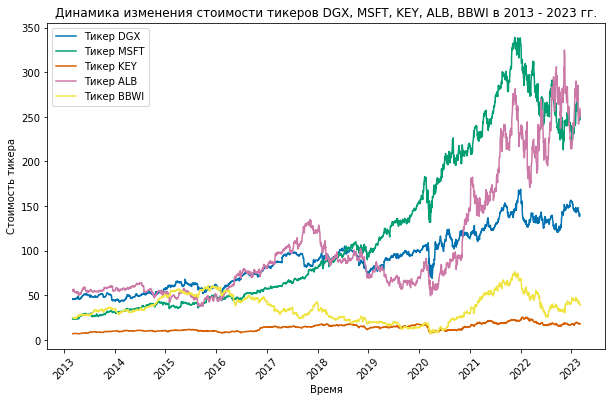

In [13]:
# Для начала построим график изменения цен 5 выбранных тикеров
lablez = pd.to_datetime(lablez) 
goda = lablez
priczes0 = z1.iloc[0,]
priczes1 = z1.iloc[1,]
priczes2 = z1.iloc[2,]
priczes3 = z1.iloc[3,]
priczes4 = z1.iloc[4,]
plt.figure(figsize=(10, 6))
plt.plot(goda, priczes0, label= f'Тикер {z1.index[0]}')
plt.plot(goda, priczes1, label= f'Тикер {z1.index[1]}')
plt.plot(goda, priczes2, label= f'Тикер {z1.index[2]}')
plt.plot(goda, priczes3, label= f'Тикер {z1.index[3]}')
plt.plot(goda, priczes4, label= f'Тикер {z1.index[4]}')                  
plt.title(f'Динамика изменения стоимости тикеров {z1.index[0]}, {z1.index[1]}, {z1.index[2]}, {z1.index[3]}, {z1.index[4]} в 2013 - 2023 гг.')
plt.xlabel("Время")
plt.ylabel("Стоимость тикера")
plt.legend()
plt.xticks(rotation=45)
plt.show()

**Вывод**: Исходя из графика можно заключить, что за последние 10 лет рынок значительно вырос.Существуют акции, которые за данный период выросли в 6 раз в цене, но также имеют место и компании, которовки тикеров которых за период выросли на несколько процентов. 
В динамике стоимости 5 тикеров ярко замента просадка в 2020 года, вызванная пандемией COVID-19 и отрицательным шоком как спроса, так и предложения акций. Также в начале 2022 заметено снижение котировок каждой из 5 рассмотренных тикеров.

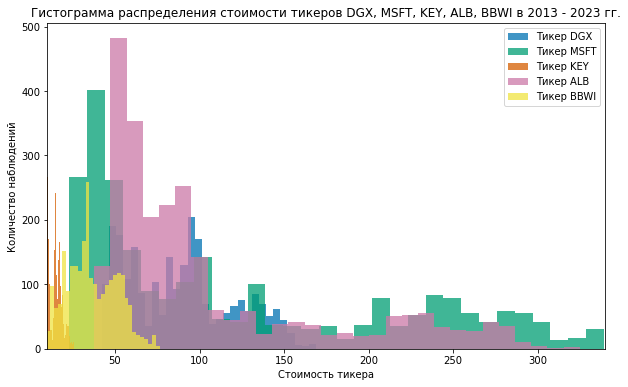

In [14]:
#edgecolor='#2D5050', color='#2CBEBE'
statistika0 = np.array([z1.iloc[0,]]).reshape(-1,)
statistika1 = np.array([z1.iloc[1,]]).reshape(-1,)
statistika2 = np.array([z1.iloc[2,]]).reshape(-1,)
statistika3 = np.array([z1.iloc[3,]]).reshape(-1,)
statistika4 = np.array([z1.iloc[4,]]).reshape(-1,) # получаем все цены 5 тикеров
plt.figure(figsize=(10, 6))
plt.hist(statistika0, bins = 30, alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[0]}')
plt.hist(statistika1, bins = 30,alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[1]}')
plt.hist(statistika2, bins = 30,alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[2]}')
plt.hist(statistika3, bins = 30,alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[3]}')
plt.hist(statistika4, bins = 30,alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[4]}')
plt.show
plt.title(f'Гистограмма распределения стоимости тикеров {z1.index[0]}, {z1.index[1]}, {z1.index[2]}, {z1.index[3]}, {z1.index[4]} в 2013 - 2023 гг.')
plt.xlabel("Стоимость тикера")
plt.ylabel("Количество наблюдений")
plt.xlim((10,340))
plt.legend()
None

**Вывод**:Так как выборка из 5 тикеров определялась случайным образом, на графике отобразились тикеры разной степени волатильности и разных трендов изменений цен. Например, тикер ALB, исходя из прошлого графика, за период 10 лет значительно вырос, а на данной гистограмме это отображатеся как наличие наблюдений на разных уровнях цен. Что нельзя сказать про тикер KEY, который на протяжении всего периода имел цену не выше примерно 25 долларов

-----------------------------

__д) [5 баллов]__ Найдите медианную цену акций за прошедший год (НЕ 10 лет) для каждого тикера. Сделайте `left join` таблицы с медианными ценами и таблицы с секторами экономики. Найдите для каждого сектора $95\%$ квантиль медианной цены.

In [15]:
df_ten_years = df_prices[(df_prices['Date'] > datetime.datetime(2022, 1, 1)) & (df_prices['Date'] < datetime.datetime(2023,1,1))]
df_ten_years.set_index('Date')
df_ten_years_median = pd.DataFrame(df_ten_years.iloc[:,1:].median())
df_ten_years_median.reset_index(inplace = True)
df_ten_years_median.columns = [['Symbol', 'Median']]
df_ten_years_median
# (￢_￢) 

,Symbol,Median
0,A,132.094055
1,AAL,14.500000
2,AAP,185.792175
3,AAPL,153.387222
4,ABBV,144.825607
...,...,...
515,ZBRA,325.369995
516,ZION,54.170490
517,ZM,103.180000
518,ZS,163.419998


In [16]:
sectorz = pd.DataFrame(df_inf[['Symbol','GICS Sector']])
result = df_ten_years_median.join(sectorz, how='left').iloc[:,1:]
result.columns = [['Median', 'Symbol', 'Sector']]
result['Mediana'] = result['Median']
result = result.drop('Median', axis = 1)
result.columns = [['Symbol', 'GICS Sector', 'Median']]
result.columns = result.columns.map(''.join) #избавляемся от мульти-индекса, не знаю, почему он изначально появился
print('Значения 95% квантиля медианной цены за прошлый год для каждого сектора экономики:', '\n',
      result.groupby('GICS Sector')['Median'].quantile(0.95))

Значения 95% квантиля медианной цены за прошлый год для каждого сектора экономики: 
 GICS Sector
Communication Services    588.994293
Consumer Discretionary    343.098694
Consumer Staples          426.435999
Energy                    676.558914
Financials                507.053992
Health Care               464.501900
Industrials               325.451990
Information Technology    331.836861
Materials                 388.453510
Real Estate               293.613464
Utilities                 424.326137
Name: Median, dtype: float64


C:\Users\dguse\AppData\Local\Temp/ipykernel_13388/3741599787.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result = result.drop('Median', axis = 1)


![shmeme.jpg](https://smart-lab.ru/uploads/images/02/61/91/2017/12/20/f6a5de.jpg)

----------------------------------

## 1.2 Риск и доходность

__е) [5 баллов]__ Финансовые продукты описываются двумя характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [17]:
# (⊙_⊙)
x = df_prices.diff()
y = df_prices.shift(1)
lablez = df_prices.iloc[1:,0] # даты измерения стоимости без первой колонки
new_df = (x.iloc[1:,1:] / y.iloc[1:,1:]) # датафрейм изменения доходности

Постройте для 5 случайно выбранных тикеров картинку с динамикой доходностей, гистограмму доходностей и ящики с усами. Ответьте на следующие вопроcы:

- Имеют ли доходности по акциям нормальное распределение? 
- Видно ли по ящику с усами, что в данных довольно много выбросов? 

__Ответ:__ Доходности по 5 тикерам имеют нормальное распределение, а исходя из диаграммы ящик с усами возможно заключить о том, что в дневной динамике изменения акций присутствует крайне высокое содержание выборосов

In [18]:
# использую код для выбора 5 случайных тикеров из предыдущего подпункта
np.random.seed(47)
new_df_go = new_df.T
chto = np.random.choice(new_df_go.index, 5) #выбираем 5 случайных тикеров
# z1 = z1.sample(5) # случайная выборка из 5 наблюдений - не дает фиксированного результата, нужен random seed
good = pd.DataFrame(columns = new_df_go.columns)
new_df_go.reset_index(inplace= True)
for i in range(len(chto)):
    good = np.append(good, new_df_go[new_df_go['index'] == chto[i]])
good = good.reshape(5,-1)
result = pd.DataFrame(good, columns = list(new_df_go.columns))
result = result.set_index('index')
result
# =^･ｪ･^=

,1,2,3,4,5,6,7,8,9,10,...,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517
index,,,,,,,,,,,,,,,,,,,,,
DGX,-0.001241,-0.016329,0.009383,0.005542,-0.000889,-0.003737,0.009109,-0.004956,-0.012451,0.013148,...,0.010637,-0.031305,0.001393,-0.00932,-0.0172,-0.009501,-0.002164,0.004626,0.005108,0.007802
MSFT,-0.009171,0.00178,-0.004975,-0.004643,0.001435,0.000358,0.00788,-0.003554,0.00214,0.002847,...,-0.015602,-0.020887,-0.004591,0.012962,-0.021784,0.003772,-0.002958,-0.012629,0.019653,0.016646
KEY,0.014706,0.026915,-0.006048,0.005071,-0.005045,0.014199,0.0,0.011,0.0,-0.003957,...,0.003669,-0.03342,-0.017288,-0.003299,0.01048,-0.000828,0.010497,0.008748,-0.028184,0.021751
ALB,0.016835,-0.006499,0.021803,-0.002896,-0.007949,0.004949,0.008926,-0.035845,-0.012182,0.002723,...,-0.096667,-0.062207,0.018557,0.030026,-0.017057,0.030058,-0.010544,-0.006567,-0.008946,0.035905
BBWI,-0.00442,-0.003995,0.009361,-0.003091,-0.009081,-0.004023,0.007181,0.007353,-0.012165,-0.024631,...,-0.000466,-0.049662,0.027723,0.039866,-0.026171,-0.023338,-0.013517,-0.035723,0.009135,-0.004526


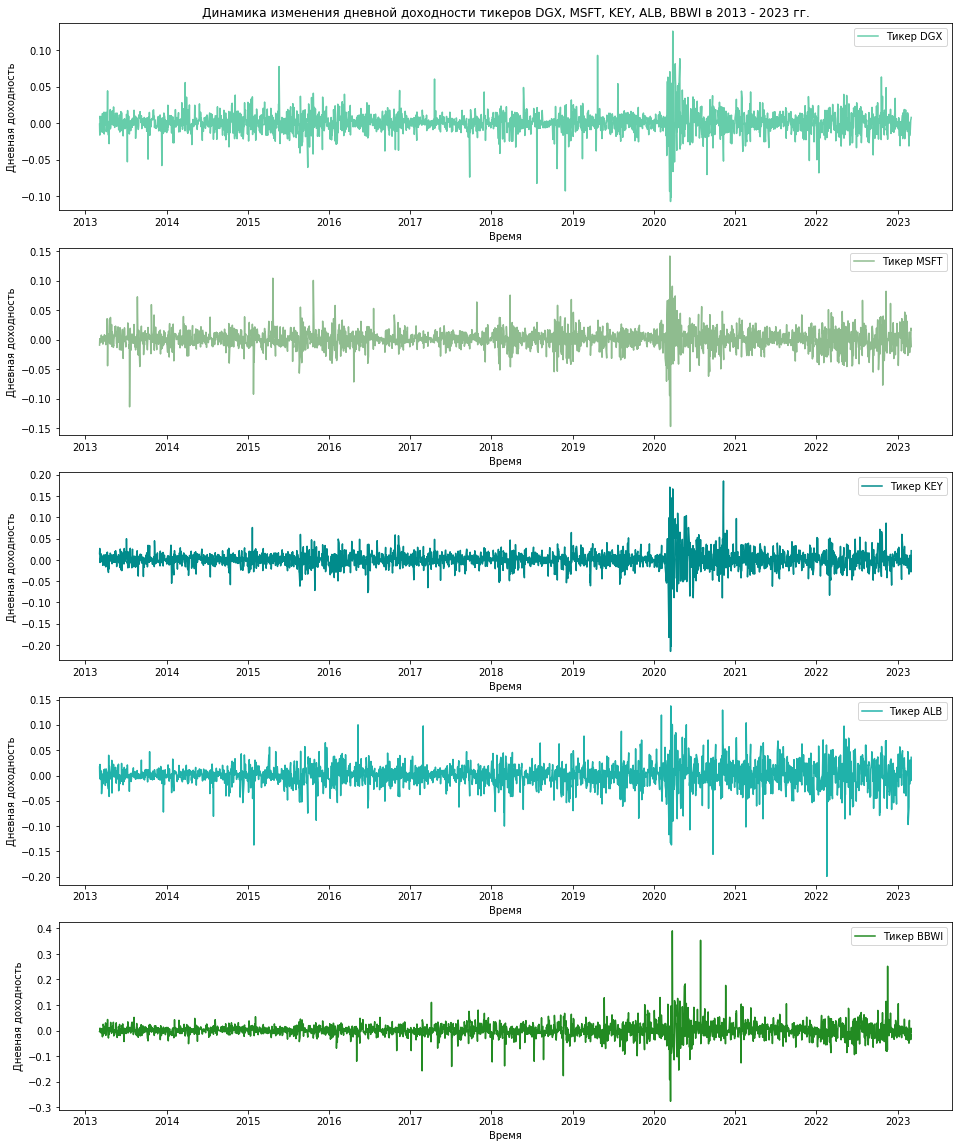

In [19]:
# Для начала построим график изменения цен 5 выбранных тикеров
goda = lablez
priczes0 = result.iloc[0,]
priczes1 = result.iloc[1,]
priczes2 = result.iloc[2,]
priczes3 = result.iloc[3,]
priczes4 = result.iloc[4,]
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(figsize=(16, 20), nrows = 5, ncols = 1)

ax1.plot(goda, priczes0, label= f'Тикер {result.index[0]}', color = '#66CDAA')
ax1.set_xlabel('Время')
ax1.set_ylabel('Дневная доходность')
ax1.set_title(f'Динамика изменения дневной доходности тикеров {result.index[0]}, {result.index[1]}, {result.index[2]}, {result.index[3]}, {result.index[4]} в 2013 - 2023 гг.')
ax1.legend()

ax2.plot(goda, priczes1, label= f'Тикер {result.index[1]}', color = '#8FBC8F')
ax2.set_xlabel('Время')
ax2.set_ylabel('Дневная доходность')
ax2.legend()

ax3.plot(goda, priczes2, label= f'Тикер {result.index[2]}',color = '#008B8B')
ax3.set_xlabel('Время')
ax3.set_ylabel('Дневная доходность')
ax3.legend()

ax4.plot(goda, priczes3, label= f'Тикер {result.index[3]}', color = '#20B2AA')
ax4.set_xlabel('Время')
ax4.set_ylabel('Дневная доходность')
ax4.legend()

ax5.plot(goda, priczes4, label= f'Тикер {result.index[4]}', color = '#228B22')
ax5.set_xlabel('Время')
ax5.set_ylabel('Дневная доходность')
ax5.legend()

plt.show()

**Вывод:** Дневая доходность 5 акций в разной степени колебалась в период с 2013 по 2019 год, но в 2020 на всех графиках заметен резкое увеличение волатильности, что также вызванно кризисом пандемии COVID-19. Также важно отметить, что после 2020 года все акции стали немного более волатильными в цене, чем в период 2013-2019 (тикер ALB - ярикй пример)

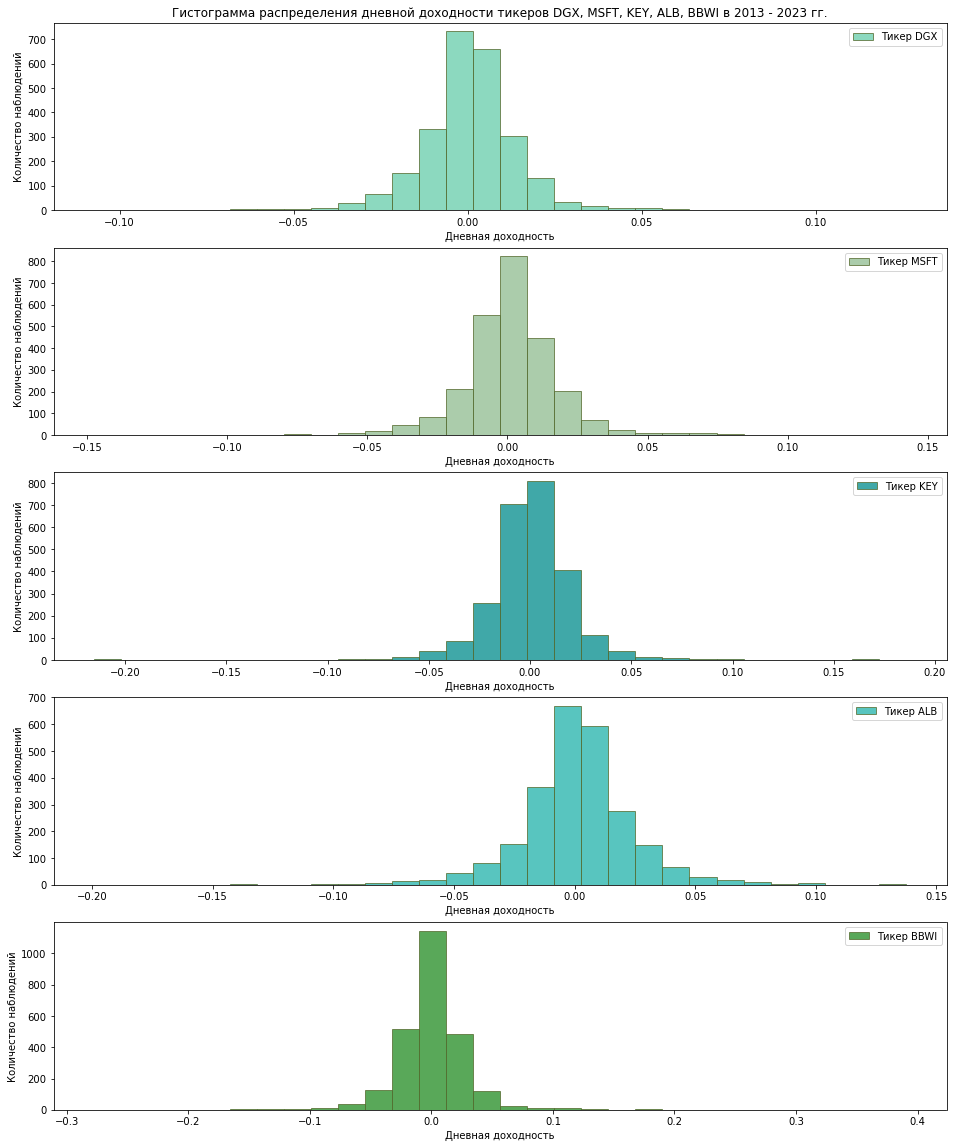

In [20]:
statistika01 = np.array([result.iloc[0,]]).reshape(-1,)
statistika11 = np.array([result.iloc[1,]]).reshape(-1,)
statistika21 = np.array([result.iloc[2,]]).reshape(-1,)
statistika31 = np.array([result.iloc[3,]]).reshape(-1,)
statistika41 = np.array([result.iloc[4,]]).reshape(-1,) # получаем все цены 5 тикеров
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(figsize=(16, 20), nrows = 5, ncols = 1)
ax1.hist(statistika01, bins = 30, alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[0]}', color = '#66CDAA', edgecolor = '#556B2F')
ax1.set_xlabel('Дневная доходность')
ax1.set_ylabel('Количество наблюдений')
ax1.set_title(f'Гистограмма распределения дневной доходности тикеров {result.index[0]}, {result.index[1]}, {result.index[2]}, {result.index[3]}, {result.index[4]} в 2013 - 2023 гг.')
ax1.legend()

ax2.hist(statistika11, bins = 30, alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[1]}', color = '#8FBC8F', edgecolor = '#556B2F')
ax2.set_xlabel('Дневная доходность')
ax2.set_ylabel('Количество наблюдений')
ax2.legend()

ax3.hist(statistika21, bins = 30, alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[2]}',color = '#008B8B', edgecolor = '#556B2F')
ax3.set_xlabel('Дневная доходность')
ax3.set_ylabel('Количество наблюдений')
ax3.legend()

ax4.hist(statistika31, bins = 30, alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[3]}', color = '#20B2AA', edgecolor = '#556B2F')
ax4.set_xlabel('Дневная доходность')
ax4.set_ylabel('Количество наблюдений')
ax4.legend()

ax5.hist(statistika41, bins = 30, alpha = 0.75, rwidth = 2, label= f'Тикер {z1.index[4]}', color = '#228B22', edgecolor = '#556B2F')
ax5.set_xlabel('Дневная доходность')
ax5.set_ylabel('Количество наблюдений')
ax5.legend()
figsize=(16, 4)

**Вывод:** Распределение дневной доходности акций крайне схоже с нормальным, однако для каждого тикера нормальное распределение буедет иметь свои параметры: у тикера BBWI практически нет хвостов и высокое содержание околонулевой доходности, а у тикер ALB менялся в цене как +10%, так и -10% - то есть у достаточно тяжелые хвосты

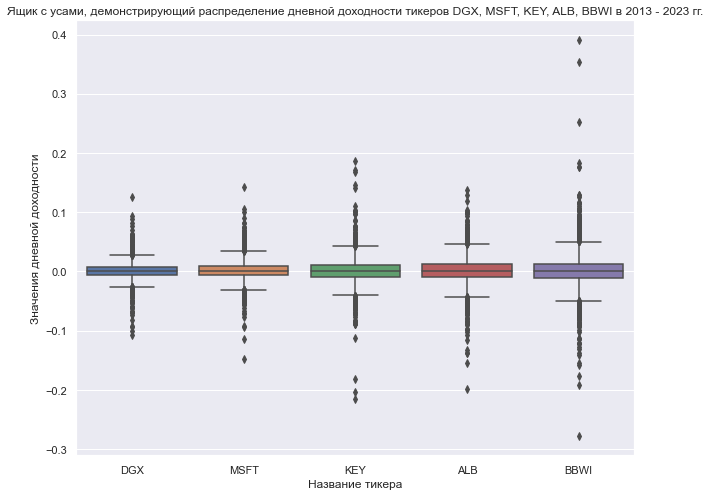

In [21]:
sns.set(rc={'figure.figsize':(10,8)})
data1=result.T
ax = sns.boxplot(data = data1)
ax.set_xlabel('Название тикера')
ax.set_ylabel('Значения дневной доходности')
ax.set_title(f'Ящик с усами, демонстрирующий распределение дневной доходности тикеров {result.index[0]}, {result.index[1]}, {result.index[2]}, {result.index[3]}, {result.index[4]} в 2013 - 2023 гг.')
plt.show()

**Вывод:** Исходя из данного графика возмоно сделать следующее заключение: практически все тикеры имеют огромное количество выборосов и сам ящик, находящийся у нулевых значений, демонстрирует только то, что в основном акции меняются незначительно за 1 день. Наибольшими выбросами обладает тикер BBWI, наименьшими - DGX. Этот график, также как и оба предыдущих, явно демонстрирует степени волатильности каждой акции - это как раз таки и есть выборсы.

Чтобы посмотреть, насколько сильно распределение отличается от нормального, можно вспользоваться диаграммой квантиль-квантиль. На картинке ниже видно, что центр распределения похож на нормальное, а квантили на хвостах отличаются от нормальных в более тяжёлую сторону. 

------------------------

__ё) [10 баллов]__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Разобьём выборку на обучающую и тестовую. Первые 4 года войдут в обучающую выборку, последний год в тестовую. Мы будем оценивать рискованность и доходность разных активов на обучающей выборке, а затем смотреть, насколько хорошо мы это сделали на тестовой.

In [22]:
lablez = pd.to_datetime(lablez) 
new_df = new_df.set_index(lablez)
df_train = new_df[new_df.index  < datetime.datetime(2022, 3, 3)] # первые 9 лет
df_test = new_df[new_df.index  >= datetime.datetime(2022, 3, 3)] # последний год

__Все расчёты ниже делайте по обучающей выборке.__ 

Посчитайте для всех компаний на обучающей выборке среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных.  Есть ли среди самых доходных компаний Тесла? :) 

In [23]:
# C (・_・)ノ
R = pd.DataFrame(df_train.mean())
R = R.reset_index()
R.columns = [['Тикер','Средняя доходность']]

R.columns = R.columns.map(''.join)
top = R.sort_values(by = ['Средняя доходность'], ascending=False).iloc[:10,:]
bottom = R.sort_values(by = ['Средняя доходность'], ascending=False).iloc[510:,:]
print('Тесла находится в верхней десятке компаний с наибольшими дневными доходностями', '\n')
print('Топ 10 самых доходных компаний:', '\n','\n', top, '\n','\n', 'Топ 10 самых убыточных компаний:', '\n','\n', bottom)

Тесла находится в верхней десятке компаний с наибольшими дневными доходностями 

Топ 10 самых доходных компаний: 
 
     Тикер  Средняя доходность
89    CEG            0.006477
275  LCID            0.004682
322  MRNA            0.003882
202   GFS            0.003782
131  DDOG            0.003149
78   CARR            0.003140
162  ENPH            0.002918
518    ZS            0.002762
463  TSLA            0.002746
116  CRWD            0.002606 
 
 Топ 10 самых убыточных компаний: 
 
     Тикер  Средняя доходность
493   WBD            0.000149
62    BEN            0.000105
426   SLB            0.000087
270   KMI            0.000071
289  LUMN            0.000060
235   IBM            0.000060
200    GE            0.000021
266   KHC           -0.000037
488  VTRS           -0.000168
405  RIVN           -0.005722


Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых.  Есть ли среди самых рискованных компаний Тесла? :) 

In [24]:
# ٩(ˊ〇ˋ*)و
STD = pd.DataFrame(df_train.std())
STD = STD.reset_index()
STD.columns = [['Тикер','Стандартное отклонение']]

STD.columns = STD.columns.map(''.join)
top1 = STD.sort_values(by = ['Стандартное отклонение'], ascending=False).iloc[:10,:]
bottom1 = STD.sort_values(by = ['Стандартное отклонение'], ascending=False).iloc[510:,:]
print('Теслы нет ни в одном из списков', '\n')
print('10 компаний с наибольшей величиной стандартного отклонения дневной доходности:', '\n','\n', top1, '\n','\n', '10 компаний с наименьшей величиной стандартного отклонения дневной доходности:', '\n','\n', bottom1)

Теслы нет ни в одном из списков 

10 компаний с наибольшей величиной стандартного отклонения дневной доходности: 
 
     Тикер  Стандартное отклонение
405  RIVN                0.072406
275  LCID                0.066841
162  ENPH                0.052601
322  MRNA                0.052030
370   PDD                0.045639
517    ZM                0.042788
202   GFS                0.041315
419  SEDG                0.040310
116  CRWD                0.039878
131  DDOG                0.039034 
 
 10 компаний с наименьшей величиной стандартного отклонения дневной доходности: 
 
     Тикер  Стандартное отклонение
110  COST                0.012303
313   MMC                0.012117
97     CL                0.011778
373   PEP                0.011443
500    WM                0.011432
413   RSG                0.011408
376    PG                0.011339
272    KO                0.011309
259   JNJ                0.011255
489    VZ                0.011099


Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Создайте таблицу `df_result`. Запищите туда три колонки: тикер, доходность и стандартное отклонение.

In [25]:
R = pd.DataFrame(df_train.mean())
R = R.reset_index()
R.columns = ['Тикер', 'Средняя доходность']
STD = pd.DataFrame(df_train.std())
STD.columns = ['Стандартное отклонение']
STD = STD.reset_index()
df_result = R
df_result['Стандартное отклонение'] = STD['Стандартное отклонение']
df_result.head()

,Тикер,Средняя доходность,Стандартное отклонение
0,A,0.000808,0.015556
1,AAL,0.000579,0.031476
2,AAP,0.000659,0.020050
3,AAPL,0.001268,0.017579
4,ABBV,0.000925,0.017331


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага.

Отдельно отметьте на картинке точку, соотвествующую Тесле так, чтобы её было видно. Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

__Ответ:__ Существует бумага, которая имеет даже немного большую доходность, но при этом среднее отклонение которой значительно ниже. И ее можно купить

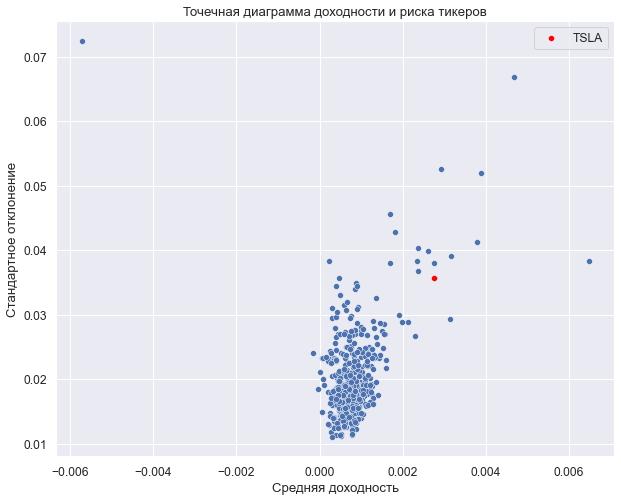

In [26]:
# (っ˘ڡ˘ς)
sns.set(rc={'figure.figsize':(10,8)})
sns.set(font_scale=1.1)
sns.scatterplot(
    x='Средняя доходность', 
    y='Стандартное отклонение', 
    data=df_result)
sns.scatterplot(x = df_result[df_result['Тикер'] == 'TSLA']['Средняя доходность'],y = df_result[df_result['Тикер'] == 'TSLA']['Стандартное отклонение'], color="red", label = 'TSLA')
plt.xlabel(
    'Средняя доходность')
plt.ylabel(
    'Стандартное отклонение')
plt.title('Точечная диаграмма доходности и риска тикеров')
plt.legend()
None

**Вывод:** Прослеживается крайне незначительная взаимосвязь: с ростом средней доходности (при ее вериличнах > 0,002) растет и стандартное отклонение (то есть волатильность бумаги). На промежутке доходности от 0 до 0,0018 эта взаимосвязь практически незаметна

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ 

__ж) [5 баллов]__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают $\text{VaR}$. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $\text{VaR}$. Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль уровня $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ $\text{VaR}$ по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Запишите `VaR` в табличку `df_result` отдельной колонкой (нужно сделать `join`). Домножьте значения VaR на -1, чтобы интерпретировать числа как потери.  

In [27]:
# ｀、ヽ｀ヽ｀、ヽ(ノ＞＜)ノ ｀、ヽ｀☂ヽ｀、ヽ
VaR = pd.DataFrame(df_train.quantile(0.05))
VaR = VaR.reset_index()
VaR.columns = [['Тикер','VaR']]

VaR.columns = VaR.columns.map(''.join)
VaR['VaR'] = VaR['VaR'] #интерпретируем числа как потери
top2 = VaR.sort_values(by = ['VaR'], ascending=False).iloc[:10,:]
bottom2 = VaR.sort_values(by = ['VaR'], ascending=False).iloc[510:,:]
print('Теслы нет ни в одном из списков', '\n')
print('10 компаний с наименьшими потерями:', '\n','\n', top2, '\n','\n', '10 компаний с наибольшими потерями:', '\n','\n', bottom2)

Теслы нет ни в одном из списков 

10 компаний с наименьшими потерями: 
 
     Тикер       VaR
500    WM -0.015233
376    PG -0.015249
272    KO -0.015495
413   RSG -0.015696
299   MCD -0.015866
373   PEP -0.015868
259   JNJ -0.015890
429    SO -0.016385
489    VZ -0.016457
97     CL -0.016865 
 
 10 компаний с наибольшими потерями: 
 
     Тикер       VaR
419  SEDG -0.055984
131  DDOG -0.056923
89    CEG -0.058496
202   GFS -0.060479
517    ZM -0.061953
370   PDD -0.065768
322  MRNA -0.072876
162  ENPH -0.073849
275  LCID -0.075715
405  RIVN -0.106831


In [28]:
# добавим получившиеся значения в нашу таблицу
VaR = pd.DataFrame(df_train.quantile(0.05)) * (-1)
VaR = VaR.reset_index()
VaR.columns = [['Тикер','VaR']]
df_result['VaR'] = VaR['VaR']
df_result.head()

,Тикер,Средняя доходность,Стандартное отклонение,VaR
0,A,0.000808,0.015556,0.025164
1,AAL,0.000579,0.031476,0.044087
2,AAP,0.000659,0.020050,0.026499
3,AAPL,0.001268,0.017579,0.025629
4,ABBV,0.000925,0.017331,0.024926


Постройте для наших ценных бумаг диаграмму рассеивания, на которой будет видно, где по своей доходности и риску находится какая ценная бумага. Отдельно отметьте теслу. В качестве меры риска используйте $\text{VaR}.$

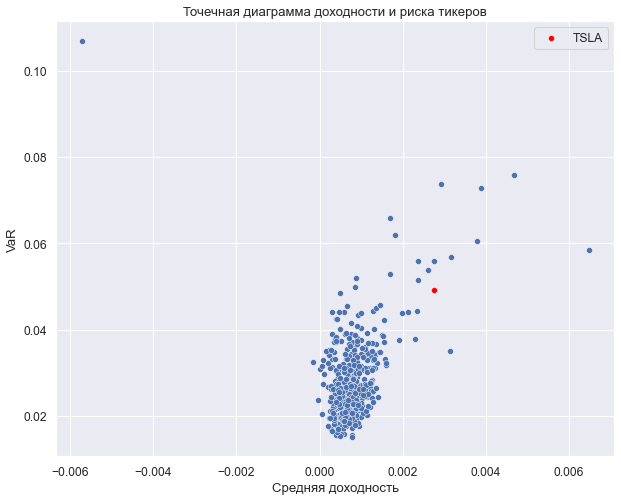

In [29]:
# ٩(x̯x)۶
sns.set(font_scale=1.1)
sns.scatterplot(
    x='Средняя доходность', 
    y='VaR', 
    data=df_result)
sns.scatterplot(x = df_result[df_result['Тикер'] == 'TSLA']['Средняя доходность'],y = df_result[df_result['Тикер'] == 'TSLA']['VaR'], color="red", label = 'TSLA')
plt.xlabel(
    'Средняя доходность')
plt.ylabel(
    'VaR')
plt.title('Точечная диаграмма доходности и риска тикеров')
plt.legend()
None

**Вывод:** С увеличением средней доходности повышается значение VaR у величин, хотя при одной и той же средней доходности между компаниями существуют сильные различия в значениях VaR (от 0,01 до 0,05 примерно)

$\text{VaR}$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $\text{VaR}$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$ худших случаев?…

__Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $\text{VaR}$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $\text{ES}$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Посчитайте, сколько денег мы заработаем в $5\%$ лучших случаев к концу дня? 

__Важно:__ $\text{VaR}$ и $\text{ES}$ в этом пункте - отрицательные числа.

In [30]:
# ( ͡⊙ ͜ʖ ͡⊙)
ES = df_train[df_train['TSLA'] <= df_train['TSLA'].quantile(0.05)]['TSLA'].mean()

money_bilo = 1000
bad_money_stalo = money_bilo * ES * (-1) #сколько денег потеряем в один из самых неудачных для вложения в Теслу дней

top5_tesla = df_train[df_train['TSLA'] >= df_train['TSLA'].quantile(0.95)]['TSLA'].mean()
good_money_stalo = top5_tesla * money_bilo

print(f'ES для Теслы равен {ES}', '\n','\n',
     f'В среднем при вложенных в Теслу 1000 долларах в неудачный день можно потерять {bad_money_stalo} долларов','\n','\n',
     f'В среднем при вложении в Теслу 1000 долларов в 5% лучших дней мы можем заработать {good_money_stalo} долларов')


ES для Теслы равен -0.07554044469806388 
 
 В среднем при вложенных в Теслу 1000 долларах в неудачный день можно потерять 75.54044469806388 долларов 
 
 В среднем при вложении в Теслу 1000 долларов в 5% лучших дней мы можем заработать 93.9084648765163 долларов


Посчитайте $\text{ES}$ по всем ценным бумагам. Домножьте получившееся значение на (-1). Запишите его отдельным столбцом в `df_result` (нужно сделать `join`)

In [31]:
# \_(ツ)_/¯
es_spisok = np.array([])
for name, values in df_train.items ():
    ES = df_train[df_train[name] <= df_train[name].quantile(0.05)][name].mean() * (-1)
    es_spisok = np.append(es_spisok, ES)
df_result['ES'] = es_spisok

In [32]:
df_result = df_result.reindex(columns=['Тикер','Стандартное отклонение','Средняя доходность','VaR','ES'])
df_result.columns = ['Ticker', 'std', 'r', 'VaR', 'ES']

In [33]:
df_result = df_result.sort_values(by=['ES'], ascending=False)
df_result = df_result.round({'std':3, 'r': 3, 'VaR':3, 'ES':3})

In [34]:
df_result.to_csv ('var_result.csv', index= False)

__Какая метрика лучше?__

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона ["Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок."](https://disk.yandex.ru/i/ryFfPZ8_1uTO6g) Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы.

## 1.3 VaR-кривая 

__з) [10 баллов]__ Мы что-то насчитали. А это вообще работает? Давайте проверим на тестовой выборке для Теслы.

In [35]:
var_tsla = df_train['TSLA'].quantile(0.05)
df_tsla = df_test['TSLA'].reset_index()
df_tsla['is_bad'] = (df_test['TSLA'].values < var_tsla)
df_tsla['is_bad'].mean()

0.14285714285714285

На тестовой выборке мы пробили для Теслы VaR в 14% случаев вместо 5%. Это очень плохой результат. Наша оценка риска оказалась провальной. Можно с помощью теста Купика проверить значимость этих отличий, но мы пока что не будем это делать. Отложим эту историю до домашки про гипотезы.

Нарисуем VaR-кривую.

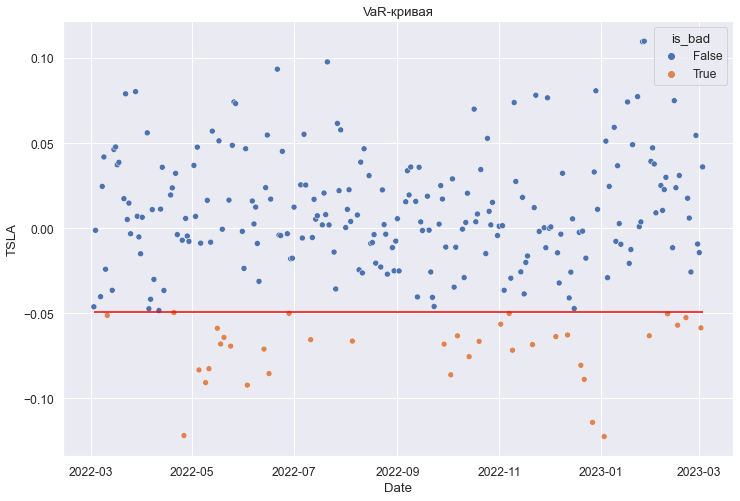

In [36]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_tsla, x='Date',y='TSLA', hue='is_bad')
plt.hlines(var_tsla, df_tsla.Date.min(), df_tsla.Date.max(), color='red')
plt.title('VaR-кривая');

А почему все это плохо? А потому, что мы не расширяем обучающую выборку, то есть не учитываем новую информацию. Мы один раз предсказали $\text{VaR}$ и так с ним и сидим. Давайте сделаем по-другому.

- Выделите $N$ точек (первые 4 года), найдите по ним $\text{VaR}$ для $N+1$ дня. Потом сдвинем $N$ точек вправо и найдём $\text{VaR}$ по ним для точки $N + 2$. И так далее. Тогда $\text{VaR}$ будет в каждой точке разный. 
- Нарисуйте получившуюся для Теслы кривую на картинке.
- Посчитайте как часто мы пробивали $\text{VaR}$ на практике, улучшилась ли цифра?

In [37]:
# ʕ•ᴥ•ʔ
experiment = df_train[df_train['TSLA'].index <= datetime.datetime(2017, 3, 6)]['TSLA'].to_frame() # первые 4 года (2013-2017)
N = len(experiment) # Это N первых точек
ret = new_df['TSLA'] # вся выборка
train = df_train['TSLA'] #тренировочная

In [38]:
somet = new_df.iloc[N+1:,:]['TSLA'] # даты тестовой выборки

In [39]:
test_iscles = ret[N+1:len(ret)] #другая тестовая выборка
chto = np.arange(N+1,len(ret)) #итерация по определенным индексам массива

In [40]:
BaR1 = np.array([])
for i in chto:
    train = ret[(i-N):(i-1)]
    BaR1 = np.append(BaR1, train.quantile(0.05))
BaR1

array([-0.04477796, -0.04477796, -0.04477796, ..., -0.0647979 ,
       -0.0647979 , -0.06437024])

In [41]:
xxx = new_df.iloc[N+1:,:]

In [42]:
xxx = xxx['TSLA'].to_frame()

In [43]:
dada = pd.DataFrame(BaR1, columns = ['VAR'])
dada = dada.set_index(somet.index)

dada.index = pd.to_datetime(dada.index, unit='D')
xxx.index = pd.to_datetime(xxx.index, unit='D')

In [44]:
xxx['ploho'] = (xxx['TSLA'] < dada['VAR'])

In [45]:
xxx['ploho'].mean() #УРААА ПОКАЗАТЕЛЬ УЛУЧШИЛСЯ

0.06830238726790451

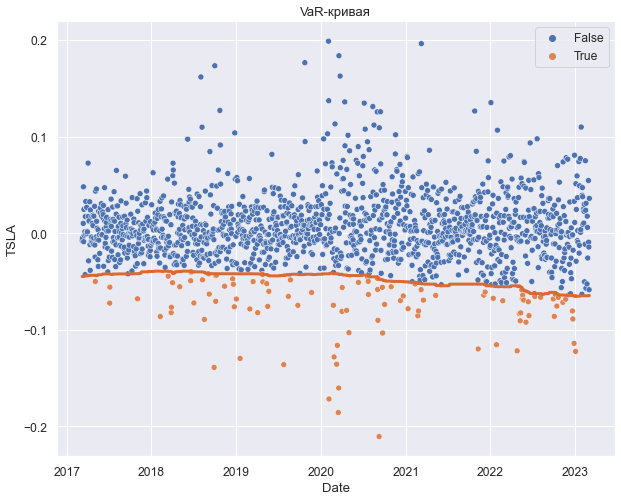

In [46]:
sns.scatterplot(data=xxx, x='Date',y='TSLA', hue='ploho')
sns.lineplot(data = dada, x='Date',y='VAR', linewidth = 3, color = '#D86B35')
plt.title('VaR-кривая');
None

**Вывод:** Исторический способ расчета VaR значительно понизил долю пробитий в изменении дневной доходности. Изначально было 14,2%, а с новым методом получилось достигнуть показателя в 6,8%

Способ оценки $\text{VaR},$ который мы использовали, называется **историческим.** Кроме него есть довольно много других способов. Например:

- можно попробовать подогнать какое-то распределение под данные и взять его квантиль
- можно попробовать обучить модель машинного обучения предсказывать соотвествующий квантиль
- можно обучить какую-нибудь модель на временном ряде
- можно попробовать отдельно моделировать хвосты распределения

Часть способов более подробно можно [посмотреть в лекциях Ильи Езепова.](https://rpubs.com/iezepov) Они немного староваты, но хороши. 

__и) [бонусные 5 баллов]__

Разберитесь как работает какой-нибудь ещё метод оценки $\text{VaR}$ и реализуйте его. Сравните его работу с историческим методом на нескольких ценных бумагах из наших данных. Например, вы можете разобраться с [ОГРом](https://rpubs.com/iezepov/e502lec2) или [моделированием хвостов.](https://rpubs.com/iezepov/e502lec6) Весь код должен быть написан на питоне. Часть бонуса -- попытаться найти библиотеки для этого.

### Метод Монте-Карло

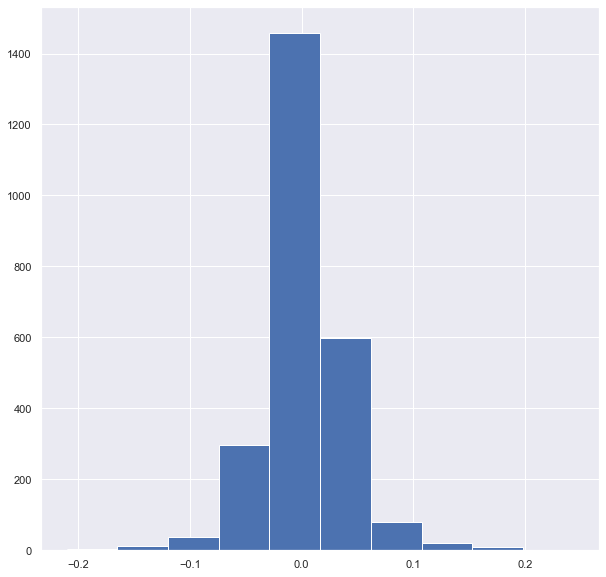

In [104]:
from scipy.optimize import curve_fit 
from scipy.stats import hypsecant
plt.hist(ret)
None
# [✖‿✖]

In [105]:
loc, scale = hypsecant.fit(ret)
hyp_plot = hypsecant.rvs(loc=loc, scale=scale, size=2517)

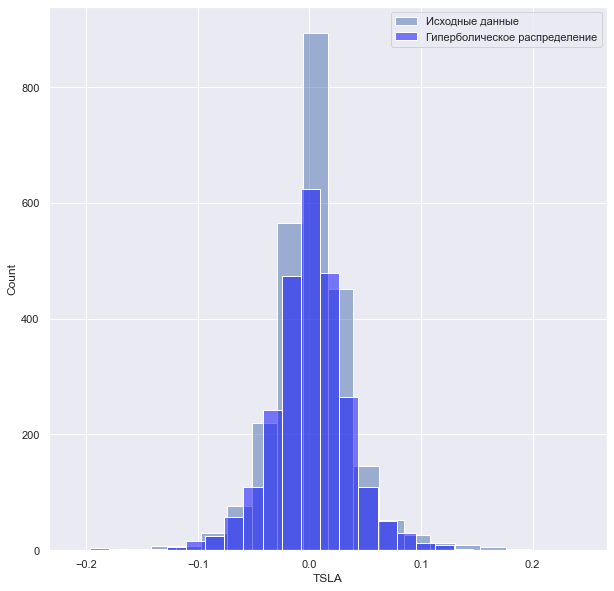

In [106]:
sns.histplot(ret, bins=20, alpha=0.5, label='Исходные данные')
sns.histplot(hyp_plot,bins=20, alpha=0.5, label='Гиперболическое распределение', color = 'blue')
plt.legend()
plt.show()

In [108]:
mista = new_df['TSLA'].index
mista

DatetimeIndex(['2013-03-06', '2013-03-07', '2013-03-08', '2013-03-11',
               '2013-03-12', '2013-03-13', '2013-03-14', '2013-03-15',
               '2013-03-18', '2013-03-19',
               ...
               '2023-02-17', '2023-02-21', '2023-02-22', '2023-02-23',
               '2023-02-24', '2023-02-27', '2023-02-28', '2023-03-01',
               '2023-03-02', '2023-03-03'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)

In [109]:
mista = pd.DataFrame(mista)
hyp_plot = pd.DataFrame(hyp_plot)
mista['OTKLONENIYE'] = hyp_plot

In [112]:
mista.set_index('Date')

,OTKLONENIYE
Date,
2013-03-06,0.043638
2013-03-07,-0.020119
2013-03-08,-0.030039
2013-03-11,0.029414
2013-03-12,0.035999
...,...
2023-02-27,-0.043406
2023-02-28,0.044981
2023-03-01,-0.000684


In [113]:
test_iscles = mista[N+1:len(mista)] #другая тестовая выборка
chto = np.arange(N+1,len(mista))

In [114]:
BaR1 = np.array([])
for i in chto:
    train = mista[(i-N):(i-1)]
    BaR1 = np.append(BaR1, mista.quantile(0.05))
BaR1

array([-0.05592163, -0.05592163, -0.05592163, ..., -0.05592163,
       -0.05592163, -0.05592163])

In [115]:
xxx = new_df.iloc[N+1:,:]

In [116]:
xxx = xxx['TSLA'].to_frame()

In [117]:
dada = pd.DataFrame(BaR1, columns = ['VAR'])
dada = dada.set_index(somet.index)

dada.index = pd.to_datetime(dada.index, unit='D')
xxx.index = pd.to_datetime(xxx.index, unit='D')

In [118]:
xxx['ploho'] = (xxx['TSLA'] < dada['VAR'])

In [119]:
xxx['ploho'].mean() #УРААА ЕЩЕ СИЛЬНЕЕ УЛУЧШИЛСЯ

0.055039787798408485

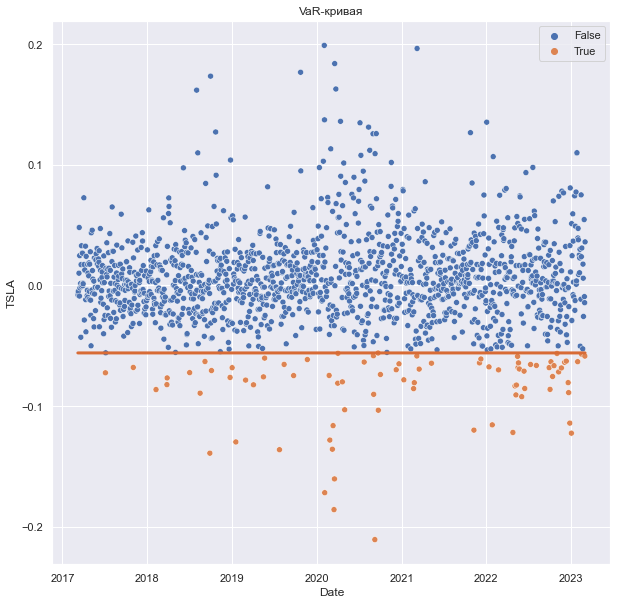

In [120]:
sns.scatterplot(data=xxx, x='Date',y='TSLA', hue='ploho')
sns.lineplot(data = dada, x='Date',y='VAR', linewidth = 3, color = '#D86B35')
plt.title('VaR-кривая');
None

  ---------

# Часть 2: чековая


> В 1992 году группа по консалтингу в области ритейла компании Teradata под руководством Томаса Блишока провела исследование 1.2 миллиона транзакций в 25 магазинах для ритейлера Osco Drug (Drug Store — формат разнокалиберных магазинов у дома). После анализа всех этих транзакций самым сильным правилом получилось «Между 17:00 и 19:00 чаще всего пиво и подгузники покупают вместе». 

>К сожалению, такое правило показалось руководству Osco Drug настолько контринтуитивным, что ставить подгузники на полках рядом с пивом они не стали. Хотя объяснение паре пиво-подгузники вполне себе нашлось: когда оба члена молодой семьи возвращались с работы домой (как раз часам к 5 вечера), жены обычно отправляли мужей за подгузниками в ближайший магазин. И мужья, не долго думая, совмещали приятное с полезным — покупали подгузники по заданию жены и пиво для собственного вечернего времяпрепровождения.

Для работы будем использовать датасет о продуктовых корзинах: https://www.kaggle.com/heeraldedhia/groceries-dataset

- `id` - номер покупки (чека)
- `fielddate` - дата покупки
- `product` - что было куплено

In [52]:
df = pd.read_csv('data/groceries.csv', sep=',')
df.columns = ['id', 'fielddate', 'product']
print(df.shape)
df.head()

(38765, 3)


,id,fielddate,product
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


## 2.1 Разогреваемся

__а) [10 баллов]__ Сколько всего уникальных заказов было сделано?

In [53]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# Для простоты уникальный заказ - уникальный id. Факт того, что под одним id могут стоять разные даты, опускается
KINGKONG = df['id'].nunique()
print(f'Всего было сделано {KINGKONG} уникальных заказов')
# ┌(ಠ_ಠ)┘

Всего было сделано 3898 уникальных заказов


Какие товары покупались чаще всего? Найдите топ-10 самых популярных товаров и изобразите частоту их покупок на столбиковой диаграмме. 

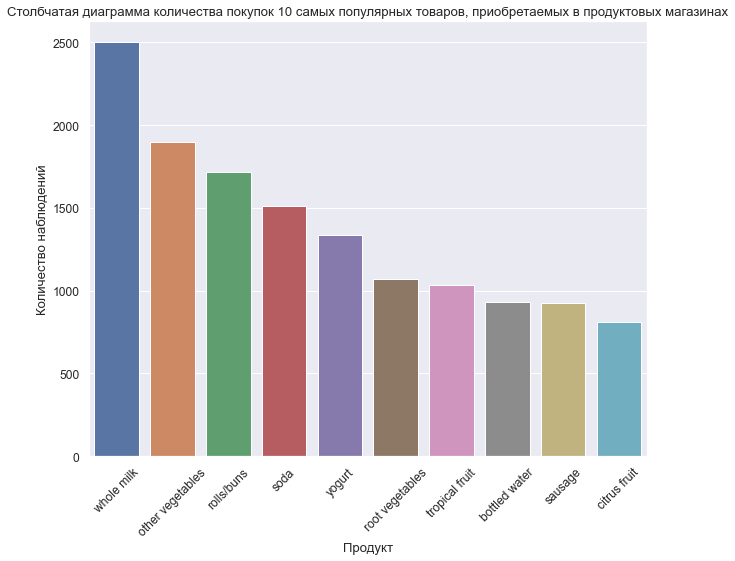

In [54]:
x = df['product'].value_counts(ascending=False)
top10_Y = x[:10].values
top10_X = x[:10].index
ax = sns.barplot(x = top10_X, y = top10_Y)
plt.xticks(rotation=45)
ax.set(xlabel='Продукт', ylabel='Количество наблюдений')
ax.set_title(f'Столбчатая диаграмма количества покупок 10 самых популярных товаров, приобретаемых в продуктовых магазинах')
None
# ( .-. )

**Вывод:** Наиболее часто покупаемыми товарами являются молоко, овощи и булочки

Визуализируйте как часто покупались товары с помощью [облака слов.](https://www.python-graph-gallery.com/wordcloud/) Для графика используйте все товары из датасета. 

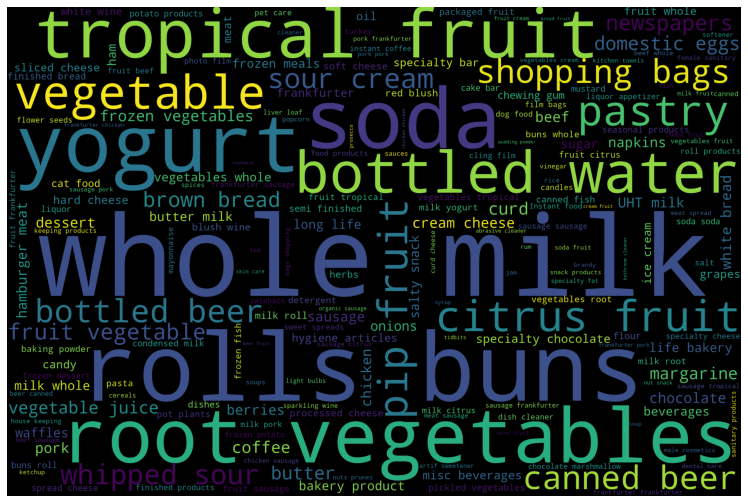

In [55]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=3000, height=2000, margin=0).generate(' '.join(df['product']))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
# ฅ^•ﻌ•^ฅ 

**Вывод:** Наиболее часто покупаемыми товарами являются молоко, овощи и булочки. Редко покупаются средства для мытья посуды, рис, орехи

__б) [10 баллов]__ Начнём анализировать совместные покупки товаров.

В таблице выше в каждой строке записана информация о покупке конкретного товара. Давайте сделаем табличку размера "число товаров" на "число покупок", чтобы понимать какие товары покупались вместе, а какие нет. 

По строкам отложите номера чеков. По столбцам отложите название продуктов. На пересечении должно стоять число товаров, купленное в этом чеке. Используйте для этого команду `pivot_table`.

In [56]:
# ٩(⁎❛ᴗ❛⁎)۶
pirson = pd.pivot_table(df,
               index=['id'],
               columns=['product'],
               aggfunc=[len], fill_value=0)
pirson

len                                             \
                    fielddate                                              
product Instant food products UHT-milk abrasive cleaner artif. sweetener   
id                                                                         
1000                        0        0                0                0   
1001                        0        0                0                0   
1002                        0        0                0                0   
1003                        0        0                0                0   
1004                        0        0                0                0   
...                       ...      ...              ...              ...   
4996                        0        0                0                0   
4997                        0        0                0                0   
4998                        0        0                0                0   
4999                        0        0                0                0   
5000                        0        0                0                0   

                                                                         ...  \
                                                                         ...   
product baby cosmetics bags baking powder bathroom cleaner beef berries  ...   
id                                                                       ...   
1000                 0    0             0                0    0       0  ...   
1001                 0    0             0                0    1       0  ...   
1002                 0    0             0                0    0       0  ...   
1003                 0    0             0                0    0       0  ...   
1004                 0    0             0                0    0       0  ...   
...                ...  ...           ...              ...  ...     ...  ...   
4996                 0    0             0                0    0       0  ...   
4997                 0    0             0                0    0       0  ...   
4998                 0    0             0                0    0       0  ...   
4999                 0    0             0                0    0       2  ...   
5000                 0    0             0                0    0       0  ...   

                                                                      \
                                                                       
product turkey vinegar waffles whipped/sour cream whisky white bread   
id                                                                     
1000         0       0       0                  0      0           0   
1001         0       0       0                  1      0           1   
1002         0       0       0                  0      0           0   
1003         0       0       0                  0      0           0   
1004         0       0       0                  0      0           0   
...        ...     ...     ...                ...    ...         ...   
4996         0       0       0                  0      0           0   
4997         0       0       0                  0      0           0   
4998         0       0       0                  0      0           0   
4999         0       0       0                  1      0           0   
5000         0       0       0                  0      0           0   

                                               
                                               
product white wine whole milk yogurt zwieback  
id                                             
1000             0          2      1        0  
1001             0          2      0        0  
1002             0          1      0        0  
1003             0          0      0        0  
1004             0          3      0        0  
...            ...        ...    ...      ...  
4996             0          0      0        0  
4997             1          1      0        0  
4998             0         

В нашей матрице огромное число нулей. Обычно такие матрицы называют разряжеными. Мы занимаем нулями кучу свободной памяти, которую мы могли бы не занимать, если бы хранили данные [в виде разреженных матриц.](https://cmdlinetips.com/2018/03/sparse-matrices-in-python-with-scipy/) У нас данные небольшие, поэтому мы забьём на неоптимальность и продолжим работать с ними в `pandas`.

Постройте матрицу корреляций Пирсона. Визуализируйте матрицу с помошью heatmap.

In [57]:
prs = pirson.corr()
boba = prs.reset_index().iloc[:,3:]
# boba.drop(columns=['len', 'fielddate'])
boba.columns = boba.columns.droplevel([0,1])
boba.index = boba.columns
boba # марица корреляций Пирсона
# ヾ(๑╹◡╹)ﾉ

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
product,,,,,,,,,,,,,,,,,,,,,
Instant food products,1.000000,-0.006936,-0.009420,-0.010825,-0.003470,-0.004007,-0.010419,-0.008275,0.005847,-0.014528,...,0.025355,0.021851,0.005348,0.014025,-0.005670,0.016640,0.002853,0.015981,0.005071,0.018221
UHT-milk,-0.006936,1.000000,0.013806,0.006105,-0.007877,0.018349,0.009462,-0.018785,0.002897,0.020801,...,-0.003803,-0.024466,0.009144,0.006618,-0.012871,-0.011550,0.009990,0.028747,0.006505,0.028753
abrasive cleaner,-0.009420,0.013806,1.000000,-0.006523,-0.002091,-0.002415,-0.013429,-0.004986,0.018970,0.001813,...,0.012922,-0.008507,-0.007390,0.002163,-0.003417,0.010777,0.000107,0.003558,0.008360,-0.009420
artif. sweetener,-0.010825,0.006105,-0.006523,1.000000,0.105251,-0.002775,-0.015432,-0.005730,-0.006645,0.016042,...,0.049392,-0.009776,0.010179,-0.006614,-0.003926,-0.006806,-0.018394,0.029591,-0.024397,-0.010825
baby cosmetics,-0.003470,-0.007877,-0.002091,0.105251,1.000000,-0.000889,-0.004947,-0.001837,0.014798,-0.007983,...,-0.003919,-0.003134,-0.007413,-0.011288,-0.001259,-0.008476,-0.005896,-0.021056,-0.000410,-0.003470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
white bread,0.016640,-0.011550,0.010777,-0.006806,-0.008476,-0.009789,-0.011195,0.005394,0.015850,0.030758,...,0.014921,0.001920,-0.000010,0.069757,0.004792,1.000000,0.046272,0.053497,0.030962,0.016640
white wine,0.002853,0.009990,0.000107,-0.018394,-0.005896,-0.006809,-0.010370,0.022577,0.015060,0.021670,...,-0.005083,0.028101,0.015072,0.000317,0.017039,0.046272,1.000000,0.032862,0.039600,-0.006953
whole milk,0.015981,0.028747,0.003558,0.029591,-0.021056,-0.024316,0.020192,0.032618,0.073856,0.028186,...,0.013874,-0.007158,0.069096,0.060338,0.039298,0.053497,0.032862,1.000000,0.103533,0.043075


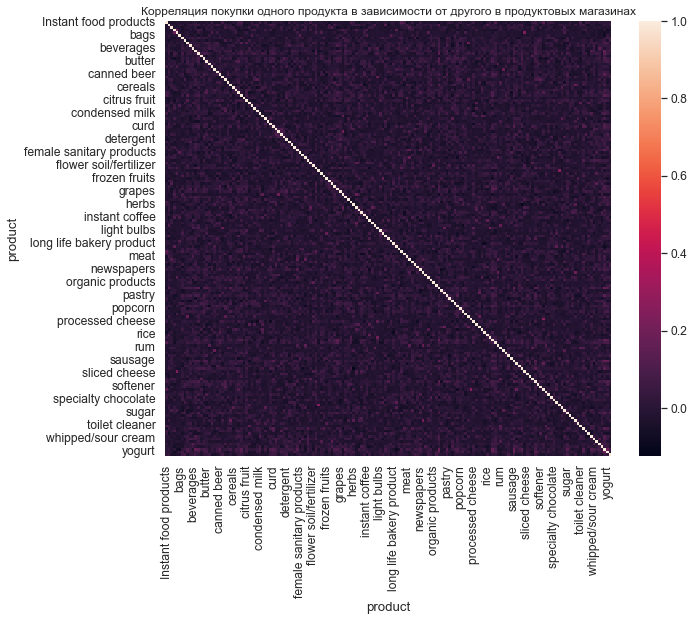

In [58]:
sns.heatmap(boba.corr())
sns.set(rc={'figure.figsize':(10,10)})
plt.title('Корреляция покупки одного продукта в зависимости от другого в продуктовых магазинах')
None

**Вывод:** Визуальное представление корреляционной таблицы крайне неудобно и несодержательно. Во-первых, слишком большое число наблюдений, которые крайне сложно в красивом формате отразить в Юпитере. Во-вторых, корреляция товаров по чеку небольшая величина в абсолютном выражении, а  в относительном она незначительно варьируется от продукта к продукту. Поэтому на тепловой карте нельзя выделить никаких существенных значений

Какие продукты сильнее всего коррелируют с яйцами, `domestic eggs` (их чаще всего покупают вместе)? Какие продукты "мешают" купить яйца, то есть отрицательно коррелируют с их покупкой? 

In [59]:
balls = boba[boba.index == 'domestic eggs'].T.sort_values(by = 'domestic eggs', ascending=False)
print(f'Наиболее сильно одомашненные яйца коррелируют с продуктами:', '\n','\n', balls[1:5], '\n','\n',f'Отрицательное же влияние на покупку яичек оказывают:',
     '\n', '\n', balls[-5:-1])
# ༼ つ ಥ_ಥ ༽つ

Наиболее сильно одомашненные яйца коррелируют с продуктами: 
 
 product          domestic eggs
product                       
meat spreads          0.083607
whole milk            0.072512
newspapers            0.064502
rubbing alcohol       0.060533 
 
 Отрицательное же влияние на покупку яичек оказывают: 
 
 product            domestic eggs
product                         
cream                  -0.020814
dessert                -0.021004
ready soups            -0.023280
cooking chocolate      -0.023280


Какие два продукта коррелируют сильнее всего? 

In [60]:
sorted_mat = boba.unstack().sort_values(ascending=True) # Так как единички не считаются, уберем их (их всего 167)
print(f'Двумя наиболее коррелируемыми продуктами являются супы и консервационные продукты:', '\n','\n', sorted_mat[:-167][-2:])
# ( ￣ー￣)

Двумя наиболее коррелируемыми продуктами являются супы и консервационные продукты: 
 
 product                product              
soups                  preservation products    0.143465
preservation products  soups                    0.143465
dtype: float64


__Вопрос:__ почему корреляция пирсона это плохой способ измерить взаимосвязть между покупками?

__Ответ:__ Во-первых, стоит отметить, что корреляция Пирсона отражает линейную взаимосвязь между величинами. То есть чем больше покупают одного продукта, тем больше (или меньше, если отрицательная) должны покупать другого продукта. Каждый продукт нужен людям в определенном количестве, и он в абсолютном выражении значительно варируется в зависимости от природы продукта: напитки покупаются часто, а приправы, скорее всего, покупаются реже чем раз в месяц. Поэтому именно линейная зависимость покупок будет крайне неэффективной. Во-вторых, и это больше относится к измерению взаимосвязи продуктов с помощью корреляций в целом, покупка продуктов - достаточно хаотичный процесс по своей сути и факт того, что два товара попали в единый чек не означает, что они как-то дополняют друг друга. 

## 2.2 Коэффициент корреляции Мэтьюса

__Коэффициент корреляции Мэтьюса__ — это мера силы взаимосвязи между двумя бинарными переменными. Для того чтобы его вычислить, необходимо использовать таблицу сопряженности

|        |  $0$   |  $1$   |
|:------:|:------:|:------:|
| $0$    |  $a$   |  $b$   |
| $1$    |  $c$   |  $d$   |

В строках таблицы сопряжённости находятся значения одного признака, по столбцам — второго, в каждой ячейке — количество объектов, на которых реализовалась эта пара. Коэффициент корреляции Мэтьюса вычисляется по данным из таблицы сопряжённости следующим образом:

$$
MCC(X_1, X_2) = \frac{a \cdot d - b \cdot c}{\sqrt{(a + b) \cdot (a + c) \cdot (b + d) \cdot (c + d)}}
$$

Точно так же, как и коэффициенты Пирсона и Спирмена, корреляция Мэтьюса лежит в диапазоне от $−1$ до $1.$ Нулевое значение соответсвуте отсутствию взаимосвязи между переменными. Значение $MCC(X_1, X_2) = 1$ соотвествует случаю, когда $X_1$ и $X_2$ полностью совпадают, то есть $b = c = 0$. Значение  $MCC(X_1, X_2) = -1$ соответствует случаю, когда каждое значение $X_1$ отличается от каждого значения $X_2$. 

Для категориальных переменных можно также считать коэффициент V-Крамера. Подробнее можно почитать про разные корреляции [в этом конспекте.](https://disk.yandex.ru/i/Znahvyg3mIrW9A)

__в) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары коэффициент корреляции Мэтьюса. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, matthews_corrcoef`. 
5. Отсортируйте получившиеся пары по коэффициенту Мэтьюса от 1 к -1 и сохраните первые сто строк получившейся таблички в файл `result_matthews.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [61]:
from sklearn.metrics import matthews_corrcoef
pirson.columns = pirson.columns.droplevel([0,1])
pirson[pirson > 0] = 1 # поменял на 1 все положительные значения (то есть если товар был в чеке)
pirson
# (⌐■_■)

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
sums = pirson.sum()
pirson_remastered = pirson.loc[:, sums >= 10] #убрал значения меньше 10
pirson_remastered #полностью настроенная таблица сопряженности

product,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,...,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
id,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
import itertools
from itertools import combinations
from sklearn.metrics import matthews_corrcoef

In [64]:
nice = list(combinations(pirson_remastered.columns,2))
spisochek = np.array([])
for i in nice:
    quagmire = i[0]
    cleveland = i[1]
    mcc = matthews_corrcoef(pirson[quagmire], pirson[cleveland])
    spisochek = np.append(spisochek, mcc)
spisochek # получили список всех коэффициентов, осталось объединить в датафрейм

array([-0.00550185, -0.00941982, -0.01082487, ...,  0.09330183,
        0.03558799,  0.02323364])

In [65]:
resulted = pd.DataFrame(nice)
spisochek1 = pd.DataFrame(spisochek)
ress = pd.concat([resulted, spisochek1], axis=1)
ress.columns = ['product_1', 'product_2', 'matthews_corrcoef']
ress = ress.sort_values(by=['matthews_corrcoef'], ascending=False)

In [66]:
res100 = ress.iloc[:100,:]
res100

,product_1,product_2,matthews_corrcoef
9689,nut snack,tea,0.117578
6542,flower (seeds),honey,0.095058
11218,sausage,yogurt,0.094040
7958,honey,ketchup,0.093365
11778,whole milk,yogurt,0.093302
...,...,...,...
2696,canned beer,root vegetables,0.059814
10442,pip fruit,syrup,0.059790
1921,butter,chewing gum,0.059775
3777,chocolate,whole milk,0.059713


In [67]:
res100.to_csv ('result_matthews.csv', index= False)

## 2.3 Независимость событий

 Конечно же, корреляция — это [не единственный способ искать](https://habr.com/ru/company/ods/blog/353502/) между покупками ассоциативные правила. Давайе попробуем другой подход.

Мы знаем, что события $A$ и $B$ называются независимыми, если $P(AB) = P(A)\cdot P(B)$. Отталкиваясь от этого определения, можно ввести другую характеристику, которая показывает, насколько продукты зависят друг от друга, а именно __поддержку (lift).__ 

$$
lift = \frac{P(AB)}{P(A)\cdot P(B)}
$$

Эта метрика описывает отношение зависимости товаров к их независимости. Если оказалось, что `lift = 1`, это означает, что покупка товара $A$ не зависит от покупки товара $B$. Если `lift > 1`, то это означает, что вероятность встретить оба товара в чеке, $P(AB)$ высокая, то есть товары покупают вместе. Если `lift < 1`, это означает, что товары, наоборот, очень часто покупают по-отдельности. 

__г) [5 баллов]__ Посчитайте значение нашей метрики для яиц и молока (`'whole milk', 'domestic eggs'`).

> Вам аккуратно нужно сделать три среза по условию  `>= 1`. Там, где пара надо делать срез так, чтобы оба товара дали `True`. Сделать это в одну строку вам поможет метод `.all(axis=1)`. Частоты можно получить методом `.mean()`, так как python думает, что `False` - это ноль, а `True` - это единица.

In [68]:
pilk = pirson_remastered[['whole milk', 'domestic eggs']]
pilk['AB'] = pirson_remastered['whole milk'] * pirson_remastered['domestic eggs']
# расчет вероятности произведения
q = pilk['AB'].sum()
p = pilk['AB']
veroyatn = q / p.size
#расчет произведения вероятностей
qa = pilk['whole milk'].sum()
pa = pilk['whole milk']
veroyatnA = qa / pa.size
qb = pilk['domestic eggs'].sum()
pb = pilk['domestic eggs']
veroyatnB = qb / pb.size
resulting = veroyatn / (veroyatnA * veroyatnB)
print(f'Значение метрики поддержки для покупок яиц и молока в продуктовых магазинах равно: {resulting}', '\n',
      'Данная величина больше единицы, что означает высокую вероятность встречи обоих этих товаров в чеке')
#  ლ(ಠ益ಠლ)

Значение метрики поддержки для покупок яиц и молока в продуктовых магазинах равно: 1.152241691425711 
 Данная величина больше единицы, что означает высокую вероятность встречи обоих этих товаров в чеке


C:\Users\dguse\AppData\Local\Temp/ipykernel_13388/66506860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilk['AB'] = pirson_remastered['whole milk'] * pirson_remastered['domestic eggs']


__д) [10 баллов]__ 

1. Оставьте в таблице сопряжённости два значения. Нулевое, если товара не был в чеке и единичное, если был
2. Отфильтруйте из рассмотрения товары, которые встречались меньше, чем в 10 чеках (оставить то, что `>= 10`)
3. Посчитайте для каждой пары значение поддержки, `lift`. Чтобы удобнее было перебрать все сочетания, используйте `combinations` из модуля `itertools`.
4. Запишите получившиеся результаты в таблицу с колонками `product_1, product_2, lift`. 
5. Отсортируйте получившиеся пары по значению lift от больших к меньшим и сохраните первые сто строк получившейся таблички в файл `result_lift.csv` Таблица должна быть без индексов. Последняя строка не должна быть пустой. Колонки друг от друга отделяются запятыми.

In [69]:
nicer = list(combinations(pirson_remastered.columns,2))
spisochek = np.array([])
sumeth = pd.DataFrame()
for i in nice:
    quagmire = i[0]
    cleveland = i[1]
    sumeth[cleveland] = pirson_remastered[quagmire] * pirson_remastered[cleveland]
    # расчет вероятности произведения
    q = sumeth[cleveland].sum()
    p = sumeth[cleveland]
    veroyatn = q / p.size
    #расчет произведения вероятностей
    qa = pirson_remastered[quagmire].sum()
    pa = pirson_remastered[quagmire]
    veroyatnA = qa / pa.size
    qb = pirson_remastered[cleveland].sum()
    pb = pirson_remastered[cleveland]
    veroyatnB = qb / pb.size
    resulting = veroyatn / (veroyatnA * veroyatnB)
    spisochek = np.append(spisochek, resulting)
spisochek.size
# your code here
# (❍ᴥ❍ʋ)

C:\Users\dguse\AppData\Local\Temp/ipykernel_13388/4101328872.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sumeth[cleveland] = pirson_remastered[quagmire] * pirson_remastered[cleveland]
C:\Users\dguse\AppData\Local\Temp/ipykernel_13388/4101328872.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sumeth[cleveland] = pirson_remastered[quagmire] * pirson_remastered[cleveland]
C:\Users\dguse\AppData\Local\Temp/ipykernel_13388/4101328872.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of 

11781

In [70]:
resulted = pd.DataFrame(nicer)
spisochek1 = pd.DataFrame(spisochek)
ress1 = pd.concat([resulted, spisochek1], axis=1)
ress1.columns = ['product_1', 'product_2', 'lift']
ress1 = ress1.sort_values(by=['lift'], ascending=False)

In [71]:
res100 = ress1.iloc[:100,:]
res100

,product_1,product_2,lift
6669,flower soil/fertilizer,organic products,24.362500
7995,honey,ready soups,19.989744
9689,nut snack,tea,19.686869
7958,honey,ketchup,18.740385
4715,cooking chocolate,ready soups,17.324444
...,...,...,...
3480,chewing gum,ready soups,5.973946
6940,frozen fish,honey,5.937548
3254,cat food,tea,5.909898
9737,nuts/prunes,soap,5.906061


In [72]:
res100.to_csv('result_lift.csv', index= False)

__е) [5 баллов]__ Давайте проинтепретируем результаты.

- Посмотрите на 10 пар продуктов с самой высокой корреляцией Мэтьюса и на 10 пар с самой низкой. Проинтерпретируйте, насколько эта корреляция логична? Придумайте ситуации, когда какие-то из пар могли бы покупаться вместе.
- Посмотрите на 10 пар продкутов с самым высоким lift, насколько логично они выделились? 
- Насколько большим оказалось пересечение двух методов? Как думаете, почему? А если взять первые сто пар?

__Ответы:__  Корреляция Мэтьюса отражает совпадения покупок товаров в одном чеке. К сожалению, максимальным его значением в наших данных является 0,11, что не дает право содержательно сказать, что эти продукты взаимосвязаны, так как величина далека от 1. Разберем примеры. Орехи и чай покупаются совместно, так как они комплименты. Сосиски и йоруг покупаются вместе, так как оба этих товара потребляются на завтрак. Молоко вместе с и йогуртом люди покупают просто из-за того,что они зачастую находятся в одном продуктовом отделе. Я думаю, что достаточно. Разберем отрицательные примеры: они также логичны, так как никто не покупает ягоды и диски с фильмами одновременно, или дешевую выпечку с белым вином. В целом, корреляция имеет место

In [73]:
topp10 = ress.iloc[:10,:]
bad10 = ress.iloc[-11:-1,:]
print(f' Пары продуктов с самой высокой корреляцией Мэтьюса: \n \n {topp10}')
print(f' Пары продуктов с самой низкой корреляцией Мэтьюса: \n \n {bad10}')
# (｡❤‿❤｡)

 Пары продуктов с самой высокой корреляцией Мэтьюса: 
 
             product_1        product_2  matthews_corrcoef
9689        nut snack              tea           0.117578
6542   flower (seeds)            honey           0.095058
11218         sausage           yogurt           0.094040
7958            honey          ketchup           0.093365
11778      whole milk           yogurt           0.093302
8582   kitchen towels              rum           0.089588
8417              jam             rice           0.088470
2954     canned fruit  potato products           0.088020
3254         cat food              tea           0.087834
6354             fish     meat spreads           0.086703
 Пары продуктов с самой низкой корреляцией Мэтьюса: 
 
                       product_1            product_2  matthews_corrcoef
4597             condensed milk       red/blush wine          -0.031814
10431                 pip fruit                soups          -0.032088
8725                     liquor  

In [74]:
topp11 = ress1.iloc[:10,:]
bad11 = ress1.iloc[-11:-1,:]
print(f' Пары продуктов с самым высоким показателем поддержки: \n \n {topp11}')
print(f' Пары продуктов с самым низким показателем поддержки: \n \n {bad11}')

 Пары продуктов с самым высоким показателем поддержки: 
 
                    product_1         product_2       lift
6669  flower soil/fertilizer  organic products  24.362500
7995                   honey       ready soups  19.989744
9689               nut snack               tea  19.686869
7958                   honey           ketchup  18.740385
4715       cooking chocolate       ready soups  17.324444
2954            canned fruit   potato products  16.874459
7114           frozen fruits           tidbits  16.107438
7993                   honey          prosecco  15.781377
8009                   honey         skin care  14.992308
4713       cooking chocolate          prosecco  13.677193
 Пары продуктов с самым низким показателем поддержки: 
 
                      product_1             product_2  lift
6183  female sanitary products   semi-finished bread   0.0
9739               nuts/prunes           soft cheese   0.0
9740               nuts/prunes              softener   0.0
9741     

**Ответ про lift:** Так как данная метрика показывает отношение завимости покупки товаров к их независимости, можно сделать выводы о том, что чем больше показатель, чем чаще два товара можно встретить в одном чеке, и наоборот. Товары женской гигиены и полуготовый хлеб действительно трудно встретить в одном чеке. Некоторые выские показатели сложно интерпретируемы, но, вот, например, покупкупку замороженных фруктов и 'tidbits' можно объяснить тем, что и то, и другое - сладкие продукты. Наверное, они как-то совместно в готовке используются

**Ответ про пересечения методов:** Эти методы считают по факту одно и то же, но в шкалах. Одно измеряется от -1 до 1, а другое от 0 до бесконечности. И тот, и другой показатель демонстрируют взаимосвзь покупок товаров